<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1]:
import pandas as pd
import psycopg2

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [4]:

query_3_1 = f'''SELECT
COUNT(vacancies.id) vac_cnt
FROM vacancies
'''

In [5]:

vac_cnt = pd.read_sql_query(query_3_1, connection)
vac_cnt

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_6620\3904310314.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vac_cnt = pd.read_sql_query(query_3_1, connection)


,vac_cnt
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [6]:

query_3_2 = f'''SELECT
COUNT(employers.id) emp_cnt
FROM employers
'''

In [7]:

emp_cnt = pd.read_sql_query(query_3_2, connection)
emp_cnt

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_6620\2117158778.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_cnt = pd.read_sql_query(query_3_2, connection)


,emp_cnt
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [8]:

query_3_3 = f'''SELECT
COUNT(areas.id) area_cnt
FROM areas
'''

In [9]:

area_cnt = pd.read_sql_query(query_3_3, connection)
area_cnt

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_6620\2828399920.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  area_cnt = pd.read_sql_query(query_3_3, connection)


,area_cnt
0,1362


4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [10]:

query_3_4 = f'''SELECT
COUNT(industries.id) ind_cnt
FROM industries
'''

In [ ]:

ind_cnt = pd.read_sql_query(query_3_4, connection)
ind_cnt

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\2913428209.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ind_cnt = pd.read_sql_query(query_3_4, connection)


,ind_cnt
0,294


## Выводы по предварительному анализу данных
23501 работодателей предлагают 49197 вакансий в 294 областях - всего задействованы вакансии в 1362 регионах

***

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [ ]:

query_4_1 = f'''SELECT
areas.name,
COUNT(vacancies.id) vac_cnt
FROM vacancies
JOIN areas ON vacancies.area_id = areas.id
GROUP BY areas.name
ORDER BY vac_cnt DESC
'''


In [ ]:

area_vac_cnt = pd.read_sql_query(query_4_1, connection)
area_vac_cnt

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\3049143231.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  area_vac_cnt = pd.read_sql_query(query_4_1, connection)


,name,vac_cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
...,...,...
764,Тарко-Сале,1
765,Новоаннинский,1
766,Бирск,1
767,Сасово,1


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [ ]:

query_4_2 = f'''SELECT
COUNT(vacancies.id) vac_cnt
FROM vacancies
WHERE salary_from IS NOT NULL OR salary_to IS NOT NULL
'''

In [ ]:

vac_cnt = pd.read_sql_query(query_4_2, connection)
vac_cnt

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\1688685675.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vac_cnt = pd.read_sql_query(query_4_2, connection)


,vac_cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [ ]:

query_4_3 = f'''SELECT
ROUND(AVG(vacancies.salary_from)) avg_from,
ROUND(AVG(vacancies.salary_to)) avg_to
FROM vacancies
'''

In [ ]:

avg_salary = pd.read_sql_query(query_4_3, connection)
avg_salary

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\212845365.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_salary = pd.read_sql_query(query_4_3, connection)


,avg_from,avg_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [ ]:

query_4_4 = f'''SELECT
vacancies.schedule,
vacancies.employment,
COUNT(vacancies.id) cnt_v
FROM vacancies
GROUP BY vacancies.schedule, vacancies.employment
ORDER BY cnt_v DESC
'''

In [ ]:

sch_emp_vac = pd.read_sql_query(query_4_4, connection)
sch_emp_vac

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\789554687.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sch_emp_vac = pd.read_sql_query(query_4_4, connection)


,schedule,employment,cnt_v
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [ ]:

query_4_5 = f'''SELECT
vacancies.experience,
COUNT(vacancies.id) vac_cnt
FROM vacancies
GROUP BY vacancies.experience
ORDER BY COUNT(vacancies.id) ASC
'''

In [ ]:

exp_vac = pd.read_sql_query(query_4_5, connection)
exp_vac

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\4187381237.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  exp_vac = pd.read_sql_query(query_4_5, connection)


,experience,vac_cnt
0,Более 6 лет,1337
1,Нет опыта,7197
2,От 3 до 6 лет,14511
3,От 1 года до 3 лет,26152


***

## Выводы по детальному анализу вакансий
Москва, Санкти-Петербург, Минсу, Новосибирск, Алматы - города-милионники, предлагающие наибольшее количество вакансий для соискателей. '
По предлагаемой зарплате - средние границы от 71 000 руб до 110 000 руб, но на эти данные сложно опираться, так как лишь в половине вакансий указаны нижняя или верхняя границы - следовательно, границы реальной средней заработной платы могут по факту оказаться иными. почти 88% вакансий предлагают работу
соискателям, как основную, постоянную (полная занятость + полный день + удаленная работа). итнтересно, что стажировка возможна в различных вариантах - и на полный день, и с удаленным графиком и в сменном графике, и в гибком - очень удобно для начиинающих специалистов, которые, возможно, менчют сферу дефтельности и не готовы кардинально менять свою жизнь и текущую работу, но могут попробовать свои силы в удобном для них формате. также важно, что компании готовы брать специалистов с небольшим опытом работы - это говорит о том, что либо готовы работать с еще молодыми специалистами, либо готовы обучать на месте и обучать именно требуемым в конкретной компании навыкам. также небошльшой опыт - это не высокие зарплаты, т.е требуетются в основном не руководители, а базовые специалисты.'

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [ ]:

query_5_1 = f'''(SELECT
employers.name,
COUNT(vacancies.id) vac_cnt
FROM employers
JOIN vacancies ON employers.id = vacancies.employer_id
GROUP BY employers.name
ORDER BY COUNT(vacancies.id) DESC
LIMIT 1)
UNION ALL
(SELECT
employers.name,
COUNT(vacancies.id) vac_cnt
FROM employers
JOIN vacancies ON employers.id = vacancies.employer_id
GROUP BY employers.name
ORDER BY COUNT(vacancies.id) DESC
OFFSET 4
LIMIT 1
)
'''

In [ ]:

emp_vac = pd.read_sql_query(query_5_1, connection)
emp_vac

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\1479977765.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_vac = pd.read_sql_query(query_5_1, connection)


,name,vac_cnt
0,Яндекс,1933
1,Газпром нефть,331


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [ ]:

query_5_2 = f'''SELECT
emp.area_name, emp.emp_cnt, vac.vac_cnt
FROM
(SELECT
areas.name area_name,
COUNT(employers.id) emp_cnt
FROM areas
LEFT JOIN employers ON areas.id = employers.area
GROUP BY areas.name
ORDER BY emp_cnt DESC) emp
JOIN
(SELECT
areas.name area_name,
COUNT(vacancies.id) vac_cnt
FROM areas
LEFT JOIN vacancies ON areas.id = vacancies.area_id
GROUP BY areas.name
ORDER BY vac_cnt DESC) vac
ON emp.area_name = vac.area_name
'''

query_5_2_1 =f'''SELECT 
areas.name area_name,
count(*) as emp_no_vac
FROM areas
LEFT JOIN vacancies on areas.id = vacancies.area_id
LEFT JOIN employers on areas.id = employers.area
WHERE vacancies.area_id is null
GROUP BY 1
order by 2 desc
LIMIT 1
'''

In [ ]:

area_emp_vac = pd.read_sql_query(query_5_2, connection)
area_emp_vac


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\1218706948.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  area_emp_vac = pd.read_sql_query(query_5_2, connection)


,area_name,emp_cnt,vac_cnt
0,Москва,5864,5333
1,Санкт-Петербург,2217,2851
2,Минск,1115,2112
3,Алматы,721,1892
4,Екатеринбург,609,1698
...,...,...,...
1357,Городище,0,0
1358,Куркино,0,0
1359,Цхалтубо,0,0
1360,Верхний Баскунчак,0,0


In [ ]:

empl_no_vac = pd.read_sql_query(query_5_2_1, connection)
empl_no_vac

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\2106902921.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empl_no_vac = pd.read_sql_query(query_5_2_1, connection)


,area_name,emp_no_vac
0,Россия,410


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [ ]:

query_5_3 =f'''SELECT
employers.name emp_name,
COUNT(DISTINCT vacancies.area_id) area_cnt
FROM employers
LEFT JOIN vacancies ON employers.id = vacancies.employer_id
GROUP BY 1
ORDER BY 2 DESC
'''

In [ ]:

empl_area = pd.read_sql_query(query_5_3, connection)
empl_area

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\2589088940.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empl_area = pd.read_sql_query(query_5_3, connection)


,emp_name,area_cnt
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
...,...,...
23170,СДЕЛКА,0
23171,Alandr Group,0
23172,СДК,0
23173,Lemon Land Lombard,0


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [ ]:

query_5_4 =f'''SELECT
COUNT(e.id)
FROM employers e
LEFT JOIN employers_industries ei ON e.id = ei.employer_id
WHERE ei.industry_id IS NULL
'''

In [ ]:

empl_ind = pd.read_sql_query(query_5_4, connection)
empl_ind

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\2082440785.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empl_ind = pd.read_sql_query(query_5_4, connection)


,count
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [ ]:

query_5_5 =f'''SELECT
e.name emp_name
FROM employers e
JOIN employers_industries ei ON e.id = ei.employer_id
GROUP BY emp_name
HAVING COUNT(ei.industry_id) = 4
ORDER BY emp_name
'''

In [312]:
empl_name = pd.read_sql_query(query_5_5, connection)
empl_name

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\1038354448.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empl_name = pd.read_sql_query(query_5_5, connection)


,emp_name
0,101 Интернет
1,21vek.by
2,2ГИС
3,2К
4,4 пикселя +
...,...
1131,ЮРИОН
1132,ЮТИП Технологии
1133,ЯКласс
1134,ЯрНео


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [ ]:

query_5_6 =f'''SELECT
COUNT(i.id) emp_cnt
FROM employers_industries ei
JOIN industries i ON i.id = ei.industry_id
where i.name like 'Разработка программного обеспечени%'
'''

In [ ]:

empl_i = pd.read_sql_query(query_5_6, connection)
empl_i

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\57418059.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empl_i = pd.read_sql_query(query_5_6, connection)


,emp_cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [ ]:

import requests
from bs4 import BeautifulSoup
url = 'https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html')
# Находим таблицу с классом "standard"
table = soup.find('table', class_='standard')
# ищем города-милионники
cities = []
if table:
    for row in table.find_all('tr'):
        cells = row.find_all('td')
        if len(cells) >= 2:
            # Извлекаем название города из второй ячейки
            city_link = cells[1].find('a')
            if city_link:
                cities.append(city_link.get_text(strip=True))
else:
    pass
cities_lst = ", ".join([f"'{i}'" for i in cities])
display(cities_lst)


"'Москва', 'Санкт-Петербург', 'Новосибирск', 'Екатеринбург', 'Казань', 'Красноярск', 'Нижний Новгород', 'Челябинск', 'Уфа', 'Самара', 'Ростов-на-Дону', 'Краснодар', 'Омск', 'Воронеж', 'Пермь', 'Волгоград'"

In [ ]:

query_5_7 =f'''((SELECT
a.name area,
COUNT(v.id) cnt
FROM vacancies v
JOIN areas a ON v.area_id = a.id
JOIN employers e ON e.id = v.employer_id
GROUP BY e.name, a.name
HAVING e.name = 'Яндекс' and a.name IN ({cities_lst})
ORDER BY 2 asc)
union all
SELECT 'Total',
sum(cnt) 
FROM 
(SELECT
a.name area,
COUNT(v.id) cnt
FROM vacancies v
JOIN areas a ON v.area_id = a.id
JOIN employers e ON e.id = v.employer_id
GROUP BY e.name, a.name
HAVING e.name = 'Яндекс' and a.name IN ({cities_lst})
) ar_vac)
'''

In [ ]:

empl_area_vac = pd.read_sql_query(query_5_7, connection)
empl_area_vac

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\2607220352.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  empl_area_vac = pd.read_sql_query(query_5_7, connection)


,area,cnt
0,Омск,21.0
1,Челябинск,22.0
2,Красноярск,23.0
3,Волгоград,24.0
4,Пермь,25.0
5,Казань,25.0
6,Ростов-на-Дону,25.0
7,Уфа,26.0
8,Самара,26.0
9,Краснодар,30.0


## Выводы по анализу работодателей
Согласно проведенным исследованиям, удалось выяснить, что 
- Яндекс предлагает почти в 6 раз больше вакансий, чем Газпром - т.е. Яндекс более ИТ компания, нежели Газпром
- Тройка ведукщих городв по количеству работадателей и предлагаемых вакансий: Москва, Санкт-Петербург и Минск
- Россию ( как страну) некоторые работадатели воспринимают как регион и указывают при размещении вакансий
- Компании Яндекс, Ростелеком, Спецремонт, Поляков Денис Иванович и ОО о ЕФИН охватывают наибольщее колисество регионов, в которых они предлагают вакансии соискателям
- У 8419 работодателей не указана сфера деятельности
- 1136 компаний охватывают 4 сферы деятельности
- У 3553 компаний указали Разработку сфере своей деятельности указана "Разработка программнрго обеспечения"
- Компания Яндекс предлагает 485 ваккансий в 16 регионах-милионниках

***

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [ ]:

query_6_1 =f'''SELECT
COUNT(v.id)
FROM vacancies v
WHERE name ILIKE '%data%' OR  name ILIKE '%данн%'
'''

In [ ]:

vac_data = pd.read_sql_query(query_6_1, connection)
vac_data

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\1190689229.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vac_data = pd.read_sql_query(query_6_1, connection)


,count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [ ]:

query_6_2 =f'''SELECT
count(v.id)
FROM vacancies v
WHERE (name ilike '%data scientist%'
OR name ILIKE '%data science%'
OR name ILIKE '%исследователь данных%'
OR name ILIKE '%machine learning%'
OR name ILIKE '%машинн%обучен%'
OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'))
AND (name ILIKE '%junior%' OR experience = 'Нет опыта' OR employment = 'Стажировка')
'''

In [ ]:

vac_scientist = pd.read_sql_query(query_6_2, connection)
vac_scientist

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\3454044819.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vac_scientist = pd.read_sql_query(query_6_2, connection)


,count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:

query_6_3 =f'''SELECT
count(id)
FROM vacancies v
where
(name ILIKE '%data scientist%'
OR name ILIKE '%data science%'
OR name ILIKE '%исследователь данных%'
OR name ILIKE '%machine learning%'
OR name ILIKE '%машинн%обучен%'
OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'))
AND (key_skills ILIKE '%SQL%' OR key_skills ILIKE '%postrgres%')
'''

In [ ]:

vac_scientist_sql = pd.read_sql_query(query_6_3, connection)
vac_scientist_sql

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\696021141.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vac_scientist_sql = pd.read_sql_query(query_6_3, connection)


,count
0,229


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [ ]:

query_6_4 =f'''SELECT
count(id)
FROM vacancies v
where
(name ILIKE '%data scientist%'
OR name ILIKE '%data science%'
OR name ILIKE '%исследователь данных%'
OR name ILIKE '%machine learning%'
OR name ILIKE '%машинн%обучен%'
OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'))
AND (key_skills ILIKE '%Python%')
'''

In [ ]:

vac_scientist_pyth = pd.read_sql_query(query_6_4, connection)
vac_scientist_pyth

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\3792835776.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vac_scientist_pyth = pd.read_sql_query(query_6_4, connection)


,count
0,357


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [ ]:

query_6_5 =f'''SELECT
ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, '\t', ''))+1),2) as avg_key_skls
      FROM vacancies v
where
(name ilike '%data scientist%'
OR name ilike '%data science%'
OR name ilike '%исследователь данных%'
OR name ilike '%machine learning%'
OR name ilike '%машинн%обучен%'
OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%'))
AND key_skills IS NOT NULL
'''

In [ ]:

key_skls = pd.read_sql_query(query_6_5, connection)
key_skls

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\3957286671.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  key_skls = pd.read_sql_query(query_6_5, connection)


,avg_key_skls
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [ ]:

query_6_6 =f'''SELECT
ROUND(AVG(COALESCE((salary_from + salary_to) / 2, salary_from, salary_to)), 0)
FROM vacancies
WHERE (
name ILIKE '%data scientist%'
OR name ILIKE '%data science%'
OR name ILIKE '%исследователь данных%'
OR name ILIKE '%machine learning%'
OR name ILIKE '%машинн%обучен%'
OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
)
AND experience = 'От 3 до 6 лет'
AND key_skills IS NOT NULL
'''

In [ ]:

exp_slr = pd.read_sql_query(query_6_6, connection)
exp_slr

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_18928\1807591681.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  exp_slr = pd.read_sql_query(query_6_6, connection)


,round
0,243115.0


***

## выводы по предметному анализу
Из анализа 49197 вакансий:
- 1771 вакансий связаны с работой с "данными"
- всего 51 вакансия для junior-специалистов - сложность поиска работы, малая вариативность вакансий для младших специалистов. ВЫскойи спрос на специалимстов с опытом
- у соискателей треуются навыки: SQL (229 вакансий) и Python (357 вакансий)
- в среднем кандидат/соискатель должен обладать не менее 6 ключевыми навыками
- средняя предлагаемая соискателям заработная плата составляет 243115 рублей

# Общий вывод по проекту

# подведем итог исследования

## Проведенное исследование вакансий в сфере Data позволило выявить ряд ключевых тенденций на рынке труда:
- 1771 вакансий - это 3.6% от всех вакансий -  связаны с работой с "данными"
- Малое количество вакансий для junior-специалистов  - показатель высокой востребованности именно специалистов с опытом, рынку требуются опытные специалисты, которве сразу могут приступеить к работе
Это говорит о том, что потребноссть в квалифицированных ИТ специалистах очень высокая
-  SQL и Python, по увсей видимости,   - самые популярные и высоковостребованные навыки в области ИТ
- в среднем кандидат/соискатель должен обладать не менее 6 ключевыми навыками - опять же показатель потребности в квалифированныцх и опытных кадрах
- средняя предлагаемая соискателям заработная плата составляет 243115 рублей - довольно высокая, опфять же показатель востренбованности данных специалистов

## Дополнительные исследования
Ниже приведен дополнительный анализ для луцчшего понимания данного рынка вакансийFyfkbn[]

- Анализ наиболее востребованных вакансий
_ Ангализ наиболее востребованных вакансий в разрезе типа занятости
- Анализ наиболее высоких средних зарплат по регионам
- Анализ наиболее высоко оплачиваемых вакансий


# Юнит 7. Дополнительные исследования данных

In [ ]:
import matplotlib.pyplot as plt

1. Кaковы ТОП 10 самых востреболванных вакансий

In [9]:
query_7_1 =f'''SELECT
name vac_name, 
count(*) vac_cnt
FROM vacancies
GROUP BY 1
ORDER BY 2 DESC
LIMIT 10
'''

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_11096\3575049977.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_vac = pd.read_sql_query(query_7_1, connection)


Text(0, 0.5, 'Количество')

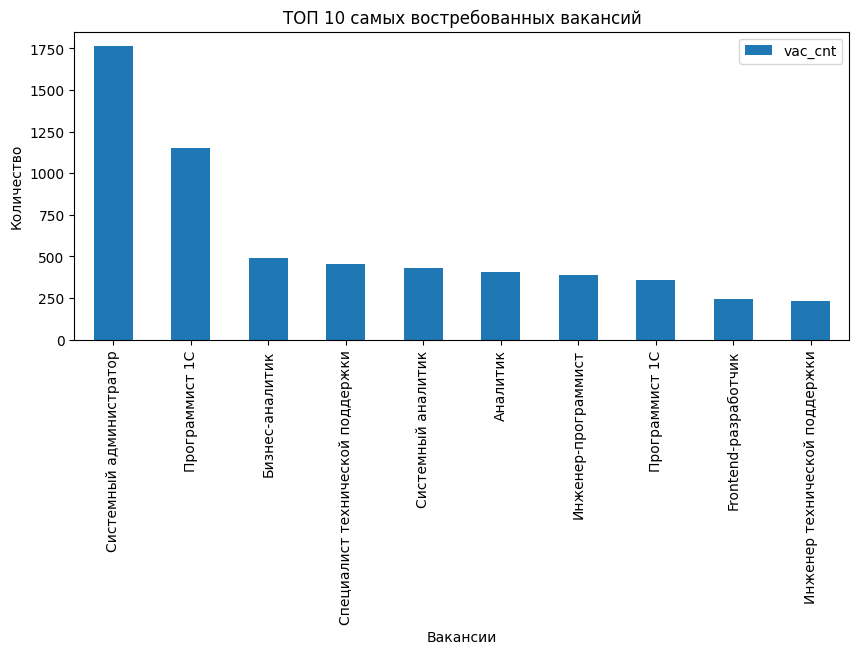

In [10]:
# результат запроса
top_vac = pd.read_sql_query(query_7_1, connection)
top_vacancies = top_vac.pivot_table(
    index='vac_name',
    values='vac_cnt',
    fill_value=0)
top_vacancies = top_vacancies.sort_values(by='vac_cnt', ascending=False)
top_vacancies.plot(
    kind='bar',
    figsize=(10, 4),
    title='ТОП 10 самых востребованных вакансий'
)
plt.xlabel('Вакансии')
plt.ylabel('Количество')


### Вывод
на графике представлены 10 самых востребованных вакансий. с большим отрывом лидируют запросы на вакансии Системный администратор и Программист 1С

2. Какие специалисты требуются при том или ином графике работы? Выведем ТОП3 вакансий при каждом типе занятости

In [11]:
query_7_2 =f'''SELECT
employment emp,
name vac_name,
COUNT(id) vac_cnt
FROM vacancies
GROUP BY 1,2
ORDER BY 1,3 DESC
'''

In [19]:
query_7_2_1 =f'''SELECT
*
FROM
(SELECT
emp,
vac_name,
vac_cnt,
dense_rank() OVER (PARTITION BY emp ORDER BY vac_cnt DESC) vc
FROM (SELECT
employment emp,
name vac_name,
COUNT(id) vac_cnt
FROM vacancies
GROUP BY 1,2
ORDER BY 1,3 DESC) vc_cnt
GROUP BY vc_cnt.emp, vc_cnt.vac_name, vc_cnt.vac_cnt) emp_vc
WHERE vc <=3
ORDER BY emp, vc ASC
'''

In [20]:
employment_vac_top = pd.read_sql_query(query_7_2_1, connection)
employment_vac_top

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_11096\3704770489.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employment_vac_top = pd.read_sql_query(query_7_2_1, connection)


,emp,vac_name,vac_cnt,vc
0,Полная занятость,Системный администратор,1717,1
1,Полная занятость,Программист 1С,1117,2
2,Полная занятость,Бизнес-аналитик,485,3
3,Проектная работа,Главный специалист отдела сопровождения проект...,12,1
4,Проектная работа,"PHP-программист Middle, Senior",9,2
5,Проектная работа,Flutter разработчик,7,3
6,Стажировка,Ученик компьютерного мастера,55,1
7,Стажировка,Стажер-программист 1С,29,2
8,Стажировка,Программист-стажер 1С,23,3
9,Частичная занятость,Младший специалист ручного тестирования,169,1


### Вывод
Выше приведены наиболее востребованные вакансии по типам занятости. Полная занятость и проектная работа подразумевают слоискателей, обладающих достаточными профессиональынми навыками и опытом работы. Стажирвока - начинающие специалисты, ученики. астичная занятость - сотрудникик службы поддержки и клиентской службы

## ТОП15 Средняя зарплата в разрезе регионов

C:\Users\Пользователь\AppData\Local\Temp\ipykernel_11096\2646531826.py:11: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_salary_region = pd.read_sql_query(query_7_3, connection)


Text(0, 0.5, 'Средняя ЗП')

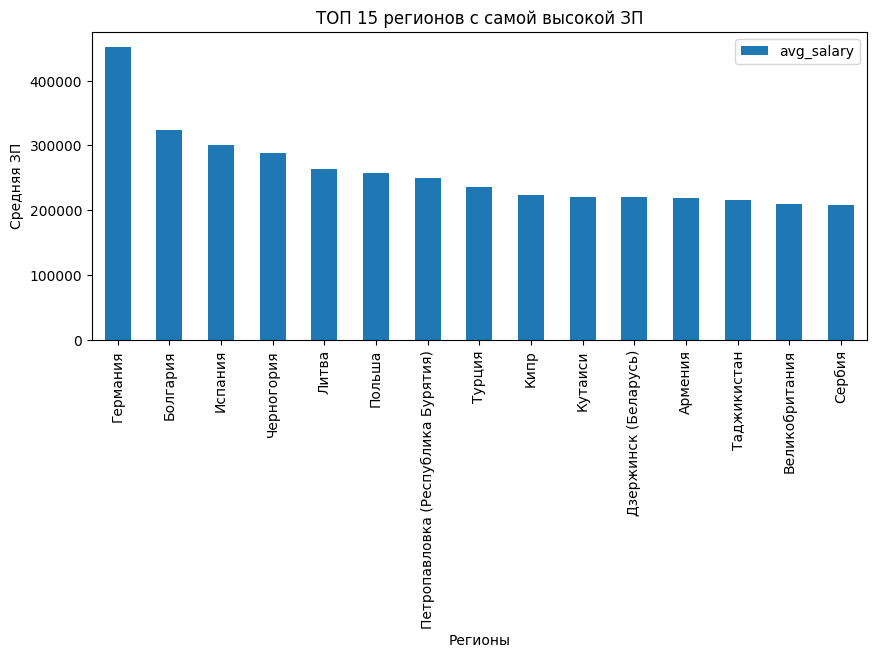

In [26]:
query_7_3 =f'''SELECT
a.name region,
ROUND(AVG(COALESCE((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to)), 0) avg_salary
FROM vacancies v
JOIN areas a ON v.area_id = a.id
WHERE v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL
GROUP BY a.name
ORDER BY avg_salary DESC
LIMIT 15
'''
top_salary_region = pd.read_sql_query(query_7_3, connection)
top_salary_region = top_salary_region.pivot_table(
    index='region',
    values='avg_salary',
    fill_value=0)
top_salary_region = top_salary_region.sort_values(by='avg_salary', ascending=False)
top_salary_region.plot(
    kind='bar',
    figsize=(10, 4),
    title='ТОП 15 регионов с самой высокой ЗП'
)
plt.xlabel('Регионы')
plt.ylabel('Средняя ЗП')

### Вывод
Самые высокие срежние зарплаты за пределамми Российской Федерации

## ТОП15 Средняя зарплата в разрезе вакансий


C:\Users\Пользователь\AppData\Local\Temp\ipykernel_11096\4130434950.py:10: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  top_salary_vacancy = pd.read_sql_query(query_7_4, connection)


Text(0, 0.5, 'Средняя ЗП')

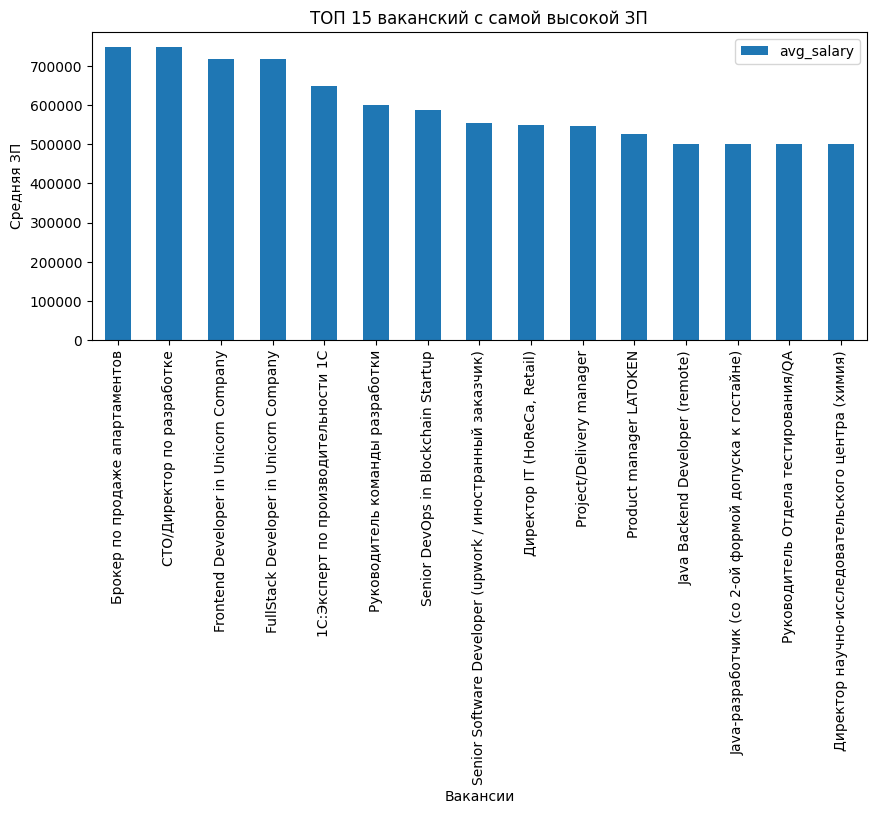

In [28]:
query_7_4 =f'''SELECT
name vac_name, 
ROUND(AVG(COALESCE((salary_from + salary_to) / 2, salary_from, salary_to)), 0) avg_salary
FROM vacancies v
WHERE v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL
GROUP BY 1
ORDER BY avg_salary DESC
LIMIT 15
'''
top_salary_vacancy = pd.read_sql_query(query_7_4, connection)
top_salary_vacancy = top_salary_vacancy.pivot_table(
    index='vac_name',
    values='avg_salary',
    fill_value=0)
top_salary_vacancy =top_salary_vacancy.sort_values(by='avg_salary', ascending=False)
top_salary_vacancy.plot(
    kind='bar',
    figsize=(10, 4),
    title='ТОП 15 ваканский с самой высокой ЗП'
)
plt.xlabel('Вакансии')
plt.ylabel('Средняя ЗП')

### Вывод
Брокер по продаже апартаментов - данная вакансифя не выглядит, как вакансифя для ИТ специалиста. говорит о том, что необходимо провести проверку и очестку представленных данных. Далее идут - руководители и ведущие специалисты. вакансии в Unicorn Company завнимают 3 и 4 строчку - я бы советовала соискателям присмотреться и к другим вакансиям данной компании.